<a href="https://colab.research.google.com/github/yashaswinidinesh/pycaret-assignment-yashaswinidinesh/blob/main/notebooks/a_regression_california_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression — California Housing (PyCaret 3)

This notebook runs a complete **PyCaret 3** regression pipeline on the **California Housing** dataset.
It has two main cells: (1) installs, (2) full pipeline (CPU fallback for stability in Colab).

In [1]:
# Pinned installs for reproducibility in Colab / Jupyter
# After this cell **restart the runtime** so new binaries load.
%pip -q install "pycaret>=3.0.4,<4" "pandas-datareader>=0.10.0" xgboost lightgbm catboost --upgrade


Shape: (20640, 9)
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


,Description,Value
0,Session id,42
1,Target,MedHouseVal
2,Target type,Regression
3,Original data shape,"(20640, 9)"
4,Transformed data shape,"(20640, 9)"
5,Transformed train set shape,"(14447, 9)"
6,Transformed test set shape,"(6193, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.3033,0.2123,0.4607,0.8415,0.1387,0.1693,3.9500
lightgbm,Light Gradient Boosting Machine,0.3195,0.2307,0.4803,0.8278,0.1450,0.1794,0.2167
xgboost,Extreme Gradient Boosting,0.3262,0.2416,0.4915,0.8197,0.1486,0.1837,0.3267
rf,Random Forest Regressor,0.3491,0.2792,0.5283,0.7916,0.1577,0.1974,9.7267
lr,Linear Regression,0.5316,0.5258,0.7251,0.6075,0.2234,0.3164,0.0800
ridge,Ridge Regression,0.5316,0.5258,0.7251,0.6075,0.2234,0.3164,0.0267
lasso,Lasso Regression,0.7686,0.9538,0.9766,0.2881,0.3079,0.5184,0.0500


Processing:   0%|          | 0/33 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3578,0.2653,0.5151,0.8014,0.1569,0.2018
1,0.3460,0.2493,0.4993,0.8139,0.1536,0.1996
2,0.3683,0.2808,0.5299,0.7910,0.1625,0.2097
Mean,0.3573,0.2651,0.5148,0.8021,0.1577,0.2037
Std,0.0091,0.0128,0.0125,0.0093,0.0037,0.0043


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 3 folds for each of 10 candidates, totalling 30 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


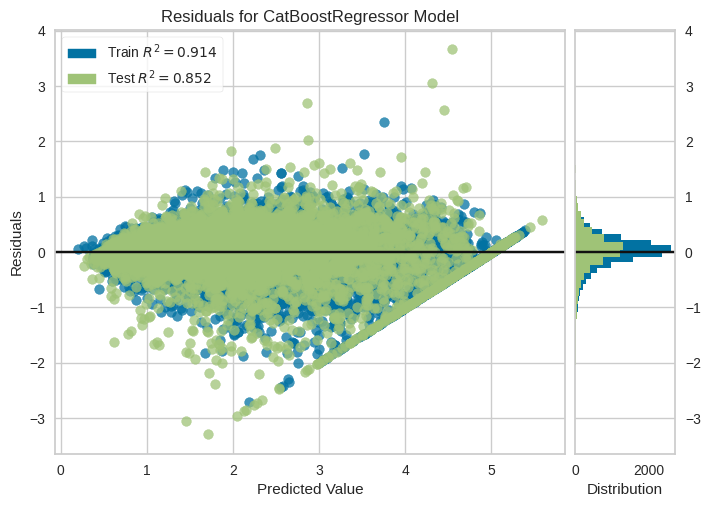

Transformation Pipeline and Model Successfully Saved
Saved: (Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['MedInc', 'HouseAge', 'AveRooms',
                                             'AveBedrms', 'Population',
                                             'AveOccup', 'Latitude',
                                             'Longitude'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('actual_estimator',
                 <catboost.core.CatBoostRegressor object at 0x7e4535284e10>)]), 'california_housing_regressor_cpu.pkl')


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,0.4033,0.2542,0.5042,0.6162,0.1211,0.1148


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,prediction_label
4648,2.0278,31.0,2.846929,1.091642,3107.0,3.128902,34.060001,-118.309998,3.60000,2.678040
8740,4.3056,30.0,5.036932,1.011364,905.0,2.571023,33.810001,-118.309998,3.36000,2.845197
162,3.6750,52.0,4.851351,0.969112,1048.0,2.023166,37.810001,-122.239998,2.69900,2.674756
15735,2.6392,26.0,3.832265,1.104701,1821.0,1.945513,37.779999,-122.430000,2.87500,3.177465
18380,9.1974,23.0,8.075950,0.965190,916.0,2.898734,37.209999,-121.860001,5.00001,4.747131


In [2]:
# === Regression — California Housing (PyCaret 3) ===
# Runs on CPU for stability; flip use_gpu=True later if your session is stable.

import pandas as pd
from sklearn.datasets import fetch_california_housing
from pycaret.regression import (
    setup, compare_models, tune_model, finalize_model,
    plot_model, save_model, predict_model
)

# 1) Load dataset into a DataFrame
cal = fetch_california_housing(as_frame=True)
df = cal.frame.copy()
print("Shape:", df.shape)
print(df.head())

# 2) PyCaret setup
exp = setup(
    data=df,
    target="MedHouseVal",
    session_id=42,
    use_gpu=False,   # set True if your GPU run is stable
    fold=3,
    n_jobs=1
)

# 3) AutoML compare and tune
top = compare_models(
    include=["lightgbm", "xgboost", "catboost", "lr", "ridge", "lasso", "rf"],
    sort="R2"
)
best = tune_model(top, optimize="R2", choose_better=True)

# 4) Evaluate, finalize, save, quick inference
plot_model(best, plot="residuals")
final = finalize_model(best)
path = save_model(final, "california_housing_regressor_cpu")
print("Saved:", path)

sample = df.sample(5, random_state=7)
display(predict_model(final, data=sample))


In [3]:
import pycaret, pandas, numpy, sklearn
print("pycaret:", pycaret.__version__)
print("pandas :", pandas.__version__)
print("numpy  :", numpy.__version__)
print("sklearn:", sklearn.__version__)


pycaret: 3.3.2
pandas : 2.1.4
numpy  : 1.26.4
sklearn: 1.4.2
